In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tabulate as tab

In [2]:
df = pd.read_csv("../data/p1_athlete_debuts.txt", sep = "\t")

In [3]:
df.describe()

,Games_Year,is_summer,Male,Birth,Age,Age_Sq,Future_Olympics,Future_Medals,Future_Golds,Future_Silvers,Future_Bronzes,Events,Team_Event,Indiv_Event,Best_Indiv_Marg,Future_Home_Same,Future_Home_Diff
count,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,132283.000000,54061.000000,132283.000000,132283.000000
mean,1979.277413,0.846088,0.740723,1954.567919,24.709494,637.789330,0.405252,0.108427,0.036792,0.036082,0.035553,1.430962,0.539389,0.589811,-16.528940,0.094721,0.099144
std,29.131004,0.360866,0.438240,30.123218,5.218279,306.056203,0.744134,0.478928,0.256983,0.220040,0.210829,1.049954,0.498448,0.491870,18.240049,0.292831,0.300747
min,1896.000000,0.000000,0.000000,1828.000000,11.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-181.000000,0.000000,0.000000
25%,1960.000000,1.000000,0.000000,1937.000000,21.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-24.000000,0.000000,0.000000
50%,1988.000000,1.000000,1.000000,1962.000000,24.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-11.000000,0.000000,0.000000
75%,2004.000000,1.000000,1.000000,1978.000000,27.000000,729.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-4.000000,0.000000,0.000000
max,2018.000000,1.000000,1.000000,2002.000000,72.000000,5184.000000,9.000000,28.000000,23.000000,5.000000,5.000000,15.000000,1.000000,1.000000,2.000000,1.000000,2.000000


In [5]:
df = df[df.Best_Indiv_Marg.notnull()]    

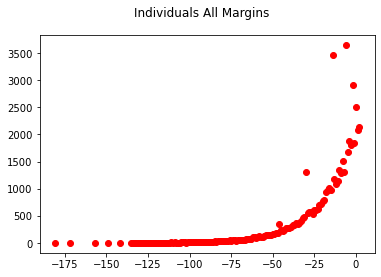

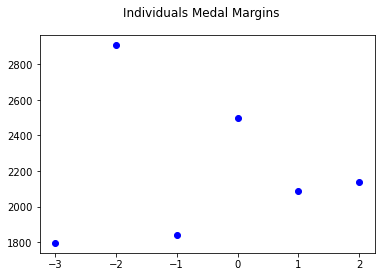

In [6]:
# Number of individuals in sample at given best debut margin
margins = list(df.Best_Indiv_Marg.unique())
margins.sort()
m_indivs = []
for m in margins:
    m_indivs.append(len(df[df.Best_Indiv_Marg == m].groupby(["Name", "Birth", "Male"])))
plt.plot(margins, m_indivs, 'ro')
plt.suptitle('Individuals All Margins')
plt.show()
plt.plot(margins[-6:], m_indivs[-6:], 'bo')
plt.suptitle('Individuals Medal Margins')
plt.show()

In [7]:
# Look at margin -1 and 0 subset
narrow_df = df[df.Best_Indiv_Marg.isin([-1, 0])]
narrow_df[narrow_df.Best_Indiv_Marg == -1].describe()

,Games_Year,is_summer,Male,Birth,Age,Age_Sq,Future_Olympics,Future_Medals,Future_Golds,Future_Silvers,Future_Bronzes,Events,Team_Event,Indiv_Event,Best_Indiv_Marg,Future_Home_Same,Future_Home_Diff
count,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.000000,1839.0,1839.0,1839.000000,1839.000000
mean,1971.560631,0.852094,0.719413,1947.238717,24.321914,615.844481,0.629690,0.262099,0.100598,0.083197,0.078303,1.641653,0.214247,1.0,-1.0,0.129418,0.133768
std,32.066689,0.355104,0.449408,33.227545,4.929725,287.064973,0.879218,0.781195,0.417509,0.335001,0.313571,1.229588,0.410410,0.0,0.0,0.335753,0.346828
min,1896.000000,0.000000,0.000000,1844.000000,14.000000,196.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,-1.0,0.000000,0.000000
25%,1948.000000,1.000000,0.000000,1925.000000,21.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,-1.0,0.000000,0.000000
50%,1976.000000,1.000000,1.000000,1954.000000,24.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,-1.0,0.000000,0.000000
75%,2000.000000,1.000000,1.000000,1975.000000,26.500000,702.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,-1.0,0.000000,0.000000
max,2018.000000,1.000000,1.000000,2001.000000,60.000000,3600.000000,8.000000,8.000000,6.000000,4.000000,4.000000,9.000000,1.000000,1.0,-1.0,1.000000,2.000000


In [8]:
narrow_df[narrow_df.Best_Indiv_Marg == 0].describe()

,Games_Year,is_summer,Male,Birth,Age,Age_Sq,Future_Olympics,Future_Medals,Future_Golds,Future_Silvers,Future_Bronzes,Events,Team_Event,Indiv_Event,Best_Indiv_Marg,Future_Home_Same,Future_Home_Diff
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.0,2496.0,2496.000000,2496.000000
mean,1974.461538,0.875401,0.767228,1950.315304,24.146234,603.913061,0.588942,0.278846,0.095753,0.098558,0.084535,1.575321,0.179087,1.0,0.0,0.128606,0.123397
std,32.191787,0.330330,0.422683,33.235100,4.569553,267.452664,0.854143,0.796265,0.396435,0.370103,0.335694,1.272783,0.383502,0.0,0.0,0.334830,0.328959
min,1896.000000,0.000000,0.000000,1840.000000,12.000000,144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000
25%,1956.000000,1.000000,1.000000,1930.000000,21.000000,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000
50%,1980.000000,1.000000,1.000000,1959.000000,24.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.0,0.000000,0.000000
75%,2000.000000,1.000000,1.000000,1976.000000,26.000000,676.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0,0.0,0.000000,0.000000
max,2018.000000,1.000000,1.000000,2001.000000,64.000000,4096.000000,6.000000,12.000000,5.000000,4.000000,5.000000,13.000000,1.000000,1.0,0.0,1.000000,1.000000


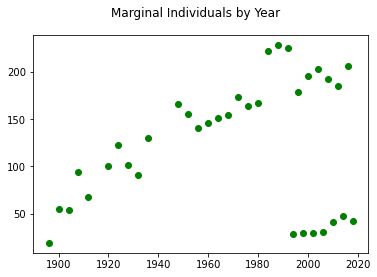

In [9]:
# Look at number of individuals availible at each games year
years = []
year_indivs = []
for k, g_df in narrow_df.groupby(["Games_Year"]):
    years.append(k)
    year_indivs.append(len(g_df))
plt.plot(years, year_indivs, 'go')
plt.suptitle('Marginal Individuals by Year')
plt.show()

In [10]:
for i in range(len(years)):
    print(str(years[i]) + ": " + str(year_indivs[i]))

1896: 19
1900: 55
1904: 54
1908: 94
1912: 68
1920: 100
1924: 122
1928: 101
1932: 91
1936: 130
1948: 166
1952: 155
1956: 141
1960: 146
1964: 151
1968: 154
1972: 173
1976: 164
1980: 167
1984: 222
1988: 228
1992: 225
1994: 28
1996: 179
1998: 30
2000: 196
2002: 29
2004: 203
2006: 31
2008: 192
2010: 41
2012: 185
2014: 47
2016: 206
2018: 42


In [11]:
# Table 1: For margins {-2, -1, 0, 1, 2} show mean (std.) of select variables
t1_margins = margins[-5:]
t1_fo_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Future_Olympics)) for m in t1_margins]
t1_fo_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Future_Olympics))+")" for m in t1_margins]
t1_fm_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Future_Medals)) for m in t1_margins]
t1_fm_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Future_Medals))+")" for m in t1_margins]
t1_fg_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Future_Golds)) for m in t1_margins]
t1_fg_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Future_Golds))+")" for m in t1_margins]
t1_m_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Male)) for m in t1_margins]
t1_m_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Male))+")" for m in t1_margins]
t1_s_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].is_summer)) for m in t1_margins]
t1_s_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].is_summer))+")" for m in t1_margins]
t1_a_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Age)) for m in t1_margins]
t1_a_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Age))+")" for m in t1_margins]
t1_ev_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Events)) for m in t1_margins]
t1_ev_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Events))+")" for m in t1_margins]
t1_tev_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Team_Event)) for m in t1_margins]
t1_tev_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Team_Event))+")" for m in t1_margins]
t1_fhs_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Future_Home_Same)) for m in t1_margins]
t1_fhs_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Future_Home_Same))+")" for m in t1_margins]
t1_fhd_means = ["{:.3g}".format(np.mean(df[df.Best_Indiv_Marg == m].Future_Home_Diff)) for m in t1_margins]
t1_fhd_stds = ["("+"{:.3g}".format(np.std(df[df.Best_Indiv_Marg == m].Future_Home_Diff))+")" for m in t1_margins]
t1_rows = [[""]+["Distance " + str(int(m)) for m in t1_margins], ["Future Olympics"]+t1_fo_means, [""]+t1_fo_stds, ["Future Medals"]+t1_fm_means, [""]+t1_fm_stds, 
           ["Future Gold Medals"]+t1_fg_means, [""]+t1_fg_stds, ["Male Dummy"]+t1_m_means, [""]+t1_m_stds, 
           ["Age"]+t1_a_means, [""]+t1_a_stds, ["Events"]+t1_ev_means, [""]+t1_ev_stds, 
           ["Team Event Dummy"]+t1_tev_means, [""]+t1_tev_stds, ["Future Home Same"]+t1_fhs_means, [""]+t1_fhs_stds, 
           ["Future Home Different"]+t1_fhd_means, [""]+t1_fhd_stds]
print(tab.tabulate(t1_rows, headers='firstrow'))
#print(tab.tabulate(t1_rows, headers='firstrow', tablefmt='latex'))

                       Distance -2    Distance -1    Distance 0    Distance 1    Distance 2
---------------------  -------------  -------------  ------------  ------------  ------------
Future Olympics        0.502          0.63           0.589         0.617         0.677
                       (0.795)        (0.879)        (0.854)       (0.868)       (0.929)
Future Medals          0.177          0.262          0.279         0.386         0.512
                       (0.759)        (0.781)        (0.796)       (0.982)       (1.14)
Future Gold Medals     0.0592         0.101          0.0958        0.161         0.234
                       (0.511)        (0.417)        (0.396)       (0.576)       (0.669)
Male Dummy             0.766          0.719          0.767         0.739         0.731
                       (0.423)        (0.449)        (0.423)       (0.439)       (0.443)
Age                    24.1           24.3           24.1          24            24
                       (4.4